#  <span style="color:red">Consignes pour l'examen </span>

**-1 Veuillez enregistrer le code source selon le format suivant : "nom_prénom_classe"**

**-2 Seuls les documents fournis par votre enseignant sont autorisés.**

**-3 Internet n'est pas autorisé. Veuillez activer le mode avion et désactiver le Wifi.**

**-4 Toute utilisation d'Internet (sur PC ou smartphone) sera considérée comme une tentative de fraude.**

**-5 Lorsqu'un étudiant quitte la salle de classe, il n'est plus autorisé à récupérer le code source du travail effectué.**

**-6 Veuillez vous assurer de vérifier soigneusement votre code avant la récupération. Chaque étudiant est responsable du code qu'il soumet, et aucune réclamation ne sera acceptée une fois que vous aurez quitté la salle.**

# <span style="color:blue">Le jeu de données </span>

Le dataset **`SALARY.csv`** contient des données relatives à la relation entre les années d'expérience professionnelle et le salaire d'un individu. Ce type de dataset est couramment utilisé pour des analyses de régression simple, où l'objectif est de prédire une variable (ici, le salaire) en fonction d'une autre variable (ici, les années d'expérience).

#### Description des Colonnes :
1. **`YearsExperience`** : Cette colonne représente le nombre d'années d'expérience professionnelle d'une personne. Elle est généralement mesurée en années et constitue la variable indépendante (ou explicative) dans les modèles de régression.
2. **`Salary`** : Cette colonne représente le salaire annuel d'une personne, généralement exprimé en dollars (ou une autre monnaie selon le dataset). C'est la variable dépendante (ou à prédire) dans un modèle de régression.


#  1. Importer les bibliothèques requises <span style="color:green">(1 pt) </span>

In [1]:
# Importer les bibliothèques requis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

# 2. Charger le jeu de données: 'SALARY.csv' <span style="color:green">(0.5 pt) </span>

In [2]:
# Charger le dataset

data = pd.read_csv('SALARY.csv')

# 3. Afficher les 5 premières lignes du jeu de données <span style="color:green">(0.5 pt) </span>

In [3]:
# Afficher les 5 premier lignes
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              NaN  43525.0
4              2.2  39891.0


# 4. Afficher la dimension du jeu de données <span style="color:green">(0.5 pt) </span>

In [4]:
# Afficher la dimension du jeu de données
print(data.shape)

(33, 2)


# 5. Afficher les informations sur le jeu de données <span style="color:green">(0.5 pt) </span>

In [5]:
# Afficher les informations
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           31 non-null     float64
dtypes: float64(2)
memory usage: 656.0 bytes
None


# 6. Interpréter le résultat  <span style="color:green">(0.5 pt) </span>

**Votre réponse :** dataset de 2 colonne et 33 lignes de type float64

# 7. Vérifier l'existence des valeurs manquantes <span style="color:green">(0.5 pt) </span>


In [6]:
# Vérification

print(data.isnull().sum())

YearsExperience    3
Salary             2
dtype: int64


# 8. Remplacer les valeurs manquantes par la médiane de la colonne correspondante <span style="color:green">(1 pt) </span>

In [7]:
# Remplir les valeurs manquantes

data.fillna(data.median(), inplace=True)

# 9. Vérifier l'absence de valeurs manquantes <span style="color:green">(0.5 pt) </span>

In [8]:
# Vérification
print(data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


# 10. Afficher la description statistique de données <span style="color:green">(0.5 pt) </span>

In [9]:
# description statistique
print(data.describe())

       YearsExperience         Salary
count        33.000000      33.000000
mean          6.536364   76503.303030
std           8.559601   35882.068063
min          -5.000000    5000.000000
25%           3.200000   56642.000000
50%           4.700000   66029.000000
75%           7.900000   98273.000000
max          50.000000  200000.000000


# 11. Interpréter chaque indice pour la variable 'Years Experience'  <span style="color:green">(1 pt) </span>

**Votre réponse :** 33 colones ; min est -5 ; max est 50 ; et moyenne est 6.5

# 12. Détecter les valeurs aberrantes dans `data['Salary']` à l’aide d’un boxplot <span style="color:green">(0.5 pt) </span>

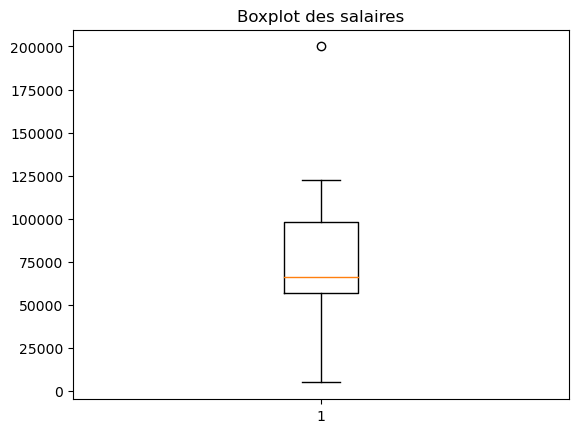

In [10]:
# Visualisation des valeurs aberrantes dans data['Salary']

plt.boxplot(data['Salary'])
plt.title('Boxplot des salaires')
plt.show()

# 13. Supprimer les valeurs aberrantes dans `data['Salary']` <span style="color:green">(1 pt) </span>

In [11]:
# Suppression des valeurs aberrantes dans data['Salary']
## Calcul du premier quartile (Q1) des salaires (25% des salaires sont inférieurs à cette valeur)

Q1 = data['Salary'].quantile(0.25)

## Calcul du troisième quartile (Q3) des salaires (75% des salaires sont inférieurs à cette valeur)

Q3 = data['Salary'].quantile(0.75)

##Calcul de l'intervalle interquartile (IQR), qui est la différence entre Q3 et Q1

IQR = Q3 - Q1
## Définition des limites inférieure et supérieure pour les valeurs aberrantes

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
## Filtrage des données pour ne conserver que les salaires qui se trouvent entre les limites inférieure et supérieure

data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]

# 14. Identifiez les valeurs aberrantes dans `data['YearsExperience']` à l’aide d’un boxplot <span style="color:green">(0.5 pt) </span>

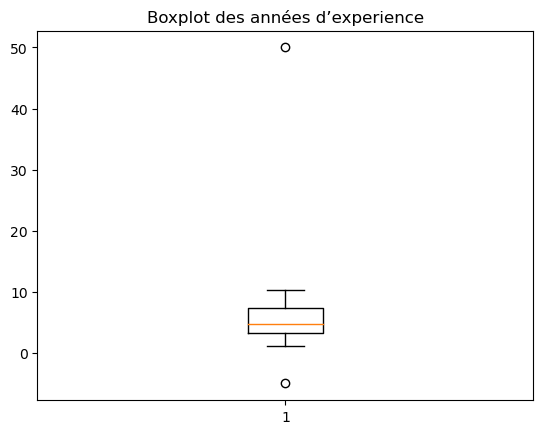

In [12]:
# Visualisation des valeurs aberrantes dans data['YearsExperience']

plt.boxplot(data['YearsExperience'])
plt.title('Boxplot des années d’experience')
plt.show()

# 15. Détecter les valeurs aberrantes dans `data['YearsExperience']` <span style="color:green">(1 pt) </span>

In [13]:
# Suppression des valeurs aberrantes dans data['SYearsExperience']
## Calcul du premier quartile (Q1) des salaires (25% des années d'experience sont inférieurs à cette valeur)
Q1 = data['YearsExperience'].quantile(0.25)

## Calcul du troisième quartile (Q3) des années d'experience (75% des années d'experience sont inférieurs à cette valeur)
Q3 = data['YearsExperience'].quantile(0.75)

##Calcul de l'intervalle interquartile (IQR), qui est la différence entre Q3 et Q1
IQR = Q3 - Q1

## Définition des limites inférieure et supérieure pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Filtrage des données pour ne conserver que les années d'experience qui se trouvent entre les limites inférieure et supérieure
data = data[(data['YearsExperience'] >= lower_bound) & (data['YearsExperience'] <= upper_bound)]



# 16. Tracer un scatter plot (le nuage de points) de `data['Salary']` vs `data['YearsExperience']` <span style="color:green">(1 pt) </span>

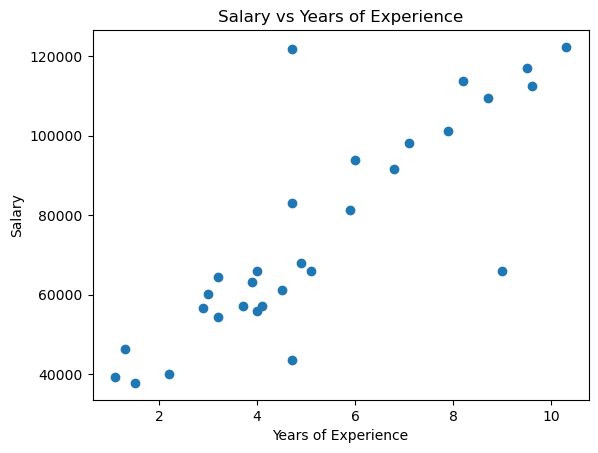

In [14]:
# scatter plot

plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

# 17. Diviser le dataset en ensembles d'entraînement (80%) et de test (20%)  <span style="color:green">(1 pt) </span>

In [15]:
# Séparation des données (feature & target)
X = data[['YearsExperience']]
y = data['Salary']
# Division en un ensemble d'entrainement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 18. Entraîner un modèle de régression linéaire <span style="color:green">(1 pt) </span>

In [16]:
# Entraînement

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 19. Afficher les paramètres $\theta_0$ (intercept) et $\theta_1$ (pente)  <span style="color:green">(1 pt) </span>

In [17]:
# Paramètres

print(f"Intercept (𝜃0) : {model.intercept_}")
print(f"Coefficient (𝜃1) : {model.coef_[0]}")

Intercept (𝜃0) : 30417.564230303164
Coefficient (𝜃1) : 8405.93458379509


# 20. Intérepréter les valeurs obtenues <span style="color:green">(1 pt) </span>

Votre réponse :  Le modele predit une augmentation de salaire de 𝜃1 (8405.93) par annee dexperience.

# 21. Tracer les valeurs réelles et les prédictions sur l'ensemble de test  <span style="color:green">(2 pt) </span>

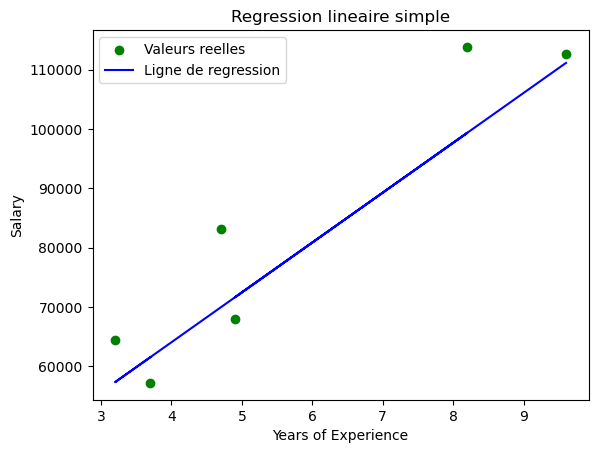

In [24]:
# Prédictions
y_pred = model.predict(X_test)

# Visualisation
plt.scatter(X_test, y_test, color='green', label='Valeurs reelles')
plt.plot(X_test, y_pred, color='blue', label='Ligne de regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression lineaire simple')
plt.legend()
plt.show()

# 21. Calculer et afficher les métriques $MAE$, $R^2$ et $RMSE$ <span style="color:green">(2 pt) </span>

In [20]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R² : {r2}")

MAE : 7379.398359416275
RMSE : 8830.345572796361
R² : 0.847346080338864


# 23. Prédire le salaire pour des années d'expérience : `[[2], [5], [10]]`.<span style="color:green">(1 pt) </span>

In [22]:
# Nouvelles prédictions
new_experience = [[2], [5], [10]]
new_salaries = model.predict(new_experience)

# Affichage
for exp, sal in zip(new_experience, new_salaries):
    print(f"Pour {exp[0]} ans dexperience, le salaire estime est {sal:.2f}.")

Pour 2 ans dexperience, le salaire estime est 47229.43.
Pour 5 ans dexperience, le salaire estime est 72447.24.
Pour 10 ans dexperience, le salaire estime est 114476.91.


C:\Users\everp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
